<a href="https://colab.research.google.com/github/Ravikiit/Quantative_Analysis/blob/main/PART4_3_Obtaining_efficient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['PG', '^GSPC']
pf_data = pd.read_csv('Markowitz_Data.csv', index_col = 'Date')

In [3]:
pf_data.head()

,PG,^GSPC
Date,,
2010-01-04,61.119999,1132.989990
2010-01-05,61.139999,1136.520020
2010-01-06,60.849998,1137.140015
2010-01-07,60.520000,1141.689941
2010-01-08,60.439999,1144.979980


In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2017-03-20,91.220001,2373.469971
2017-03-21,91.190002,2344.020020
2017-03-22,90.989998,2348.449951
2017-03-23,90.769997,2345.959961
2017-03-24,90.570000,2343.979980


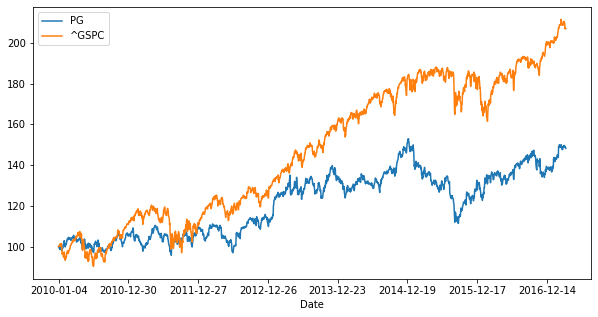

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [8]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [9]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [10]:
num_assets = len(assets)


In [11]:
num_assets

2

In [12]:
arr = np.random.random(2)
arr

array([0.10478293, 0.01177393])

In [13]:
arr[0] + arr[1]

0.11655686145509592

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.65371343, 0.34628657])

In [15]:
weights[0] + weights[1]

1.0

Expected Portfolio Return

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.06997275949519963

Expected Portfolio Variance

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.017212671049755074

Expected Portfolio Volatility

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.13119706951664384

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.07198605567041103,
  0.08354960877487634,
  0.06722125819707479,
  0.05464854186001196,
  0.08129272594586406,
  0.09040034939484276,
  0.09149742386267629,
  0.05553733849308138,
  0.07348921492971486,
  0.07631353115357477,
  0.06339335375713966,
  0.07235737566466716,
  0.06524413826819596,
  0.09112679768737894,
  0.09295569083346582,
  0.09792942896938948,
  0.08596745842275827,
  0.06727447341598686,
  0.0838063245166304,
  0.0808278066593201,
  0.07894333311241775,
  0.0614979523367346,
  0.08172244960842846,
  0.06924396430323232,
  0.07332983811388952,
  0.0969690588657984,
  0.09935696874526204,
  0.07746784030480443,
  0.0678255574328096,
  0.09261650838353903,
  0.079972610200745,
  0.07996471266016897,
  0.06518755420783,
  0.07919712444758205,
  0.05948717145335318,
  0.054928814939323216,
  0.06984170475128612,
  0.08017825716484303,
  0.07123822512975511,
  0.08031927442150036,
  0.06664129184041453,
  0.06935945633437515,
  0.058610435144824724,
  0.060977509341029

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.07686856, 0.0770048 , 0.08867721, 0.07708969, 0.09124853,
        0.07761807, 0.08829192, 0.05746769, 0.0598113 , 0.07204599,
        0.07138423, 0.07484914, 0.09022657, 0.09799613, 0.09287076,
        0.07800482, 0.08018273, 0.05832758, 0.09162166, 0.09608004,
        0.07071055, 0.0812962 , 0.06326024, 0.08549014, 0.06072393,
        0.06929861, 0.08004807, 0.05712533, 0.0914496 , 0.08004586,
        0.09888577, 0.09972175, 0.08066067, 0.08172971, 0.07023753,
        0.06004653, 0.09342563, 0.06437175, 0.07425997, 0.072794  ,
        0.08493887, 0.06627207, 0.07147141, 0.08753435, 0.07843646,
        0.06833919, 0.05837475, 0.05585971, 0.0652706 , 0.08470532,
        0.09073066, 0.07345845, 0.08978887, 0.08029799, 0.0883891 ,
        0.06891919, 0.06220752, 0.08199473, 0.07663133, 0.05587964,
        0.069409  , 0.07992639, 0.06139326, 0.08452642, 0.05697281,
        0.06100174, 0.09814899, 0.08787382, 0.08769766, 0.06970487,
        0.05835539, 0.08135617, 0.08707016, 0.07

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.076869,0.131169
1,0.077005,0.131201
2,0.088677,0.138474
3,0.077090,0.131222
4,0.091249,0.141194


In [23]:
portfolios.tail()

,Return,Volatility
995,0.086892,0.136809
996,0.083629,0.134263
997,0.059936,0.136927
998,0.070306,0.131121
999,0.084256,0.134701


Text(0, 0.5, 'Expected Return')

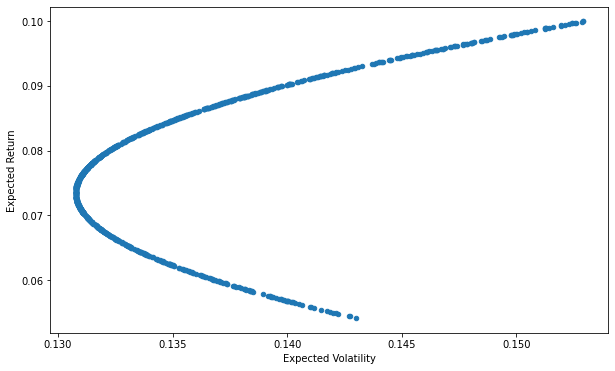

In [25]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')